### P428 - P483

In [17]:
# set up 

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 1,Vanishing Gradient

# 2,Use pretrain layers 

# 3,Optimizers

# 4,Regularization


# ====================================

# 1, Vanishing Gradient

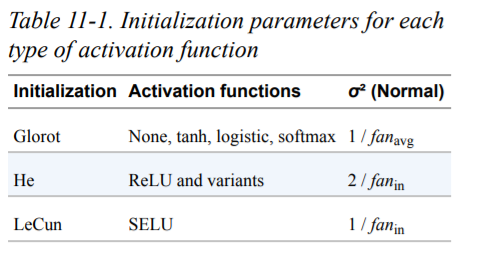

In [18]:
### for exapmle "he_normal"

#keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [19]:
### Relu dying 

# use leakReLU: LeakyReLU(z) = max(az, z) 

# just add it after the layer you want to apply it to 
# keras.layers.LeakyReLU(alpha=0.2)

In [20]:
import tensorflow as tf 
from tensorflow import keras

### Batch Normalization

In [21]:
### implementing with Keras 

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='elu', kernel_initializer = 'he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='elu', kernel_initializer = 'he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

# can set: use_bias = False 

# other param for BN: axis

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_7 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_8 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

### Gradient Cliping 

In [23]:
#optimizer = keras.optimizers.SGD(clipvalue=1.0) 

#model.complie(loss = 'mse', optimizer = optimizer)

### Transfer learning 

remember to resize the data 

In [24]:
# prepare for model A 

# the data set 
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# split the data
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]



In [14]:
# train the model A 

# define the model 
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

# compile the model 
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

# train and save the model 
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 8s 5ms/step - loss: 0.5423 - accuracy: 0.8231 - val_loss: 0.3676 - val_accuracy: 0.8685
Epoch 2/20
1375/1375 [==============================] - 9s 7ms/step - loss: 0.3529 - accuracy: 0.8784 - val_loss: 0.3187 - val_accuracy: 0.8864
Epoch 3/20
1375/1375 [==============================] - 9s 7ms/step - loss: 0.3189 - accuracy: 0.8885 - val_loss: 0.2978 - val_accuracy: 0.8974
Epoch 4/20
1375/1375 [==============================] - 9s 7ms/step - loss: 0.3002 - accuracy: 0.8951 - val_loss: 0.2803 - val_accuracy: 0.9008
Epoch 5/20
1375/1375 [==============================] - 9s 7ms/step - loss: 0.2868 - accuracy: 0.9002 - val_loss: 0.2731 - val_accuracy: 0.9068
Epoch 6/20
1375/1375 [==============================] - 9s 6ms/step - loss: 0.2772 - accuracy: 0.9042 - val_loss: 0.2648 - val_accuracy: 0.9106
Epoch 7/20
1375/1375 [==============================] - 9s 7ms/step - loss: 0.2685 - accuracy: 0.9074 - val_loss: 0.2587 - val_accuracy:

In [16]:
# save model A 

model_A.save("my_model_A.h5")

In [17]:
# first clone the model 

model_A_clone = keras.models.clone_model(model_A) 
model_A_clone.set_weights(model_A.get_weights())

# reuse model A 

model_A_clone = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))

In [19]:
### to avoid cold-start of the new layer: freeze the old layers and train the new ones for the first few epochs

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
    
model_B_on_A.compile(loss="binary_crossentropy", optimizer="sgd",
                    metrics = ["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
    validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 51ms/step - loss: 0.2760 - accuracy: 0.9350 - val_loss: 0.2080 - val_accuracy: 0.9635
Epoch 2/4
7/7 [==============================] - 0s 19ms/step - loss: 0.1818 - accuracy: 0.9650 - val_loss: 0.1583 - val_accuracy: 0.9746
Epoch 3/4
7/7 [==============================] - 0s 23ms/step - loss: 0.1404 - accuracy: 0.9750 - val_loss: 0.1322 - val_accuracy: 0.9797
Epoch 4/4
7/7 [==============================] - 0s 22ms/step - loss: 0.1171 - accuracy: 0.9750 - val_loss: 0.1160 - val_accuracy: 0.9797


In [20]:
### now unfreeze and train 

#unfreeze
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True
    
optimizer = keras.optimizers.SGD(lr=1e-4) # the default lr is 1e-2

#compile
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer,
metrics=["accuracy"])

#train 
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
    validation_data=(X_valid_B, y_valid_B))

C:\Users\JZ\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/16
7/7 [==============================] - 1s 39ms/step - loss: 0.1065 - accuracy: 0.9750 - val_loss: 0.1151 - val_accuracy: 0.9797
Epoch 2/16
7/7 [==============================] - 0s 18ms/step - loss: 0.1055 - accuracy: 0.9750 - val_loss: 0.1142 - val_accuracy: 0.9797
Epoch 3/16
7/7 [==============================] - 0s 20ms/step - loss: 0.1046 - accuracy: 0.9750 - val_loss: 0.1132 - val_accuracy: 0.9807
Epoch 4/16
7/7 [==============================] - 0s 23ms/step - loss: 0.1036 - accuracy: 0.9750 - val_loss: 0.1124 - val_accuracy: 0.9807
Epoch 5/16
7/7 [==============================] - 0s 23ms/step - loss: 0.1026 - accuracy: 0.9750 - val_loss: 0.1115 - val_accuracy: 0.9807
Epoch 6/16
7/7 [==============================] - 0s 26ms/step - loss: 0.1017 - accuracy: 0.9750 - val_loss: 0.1106 - val_accuracy: 0.9807
Epoch 7/16
7/7 [==============================] - 0s 23ms/step - loss: 0.1008 - accuracy: 0.9750 - val_loss: 0.1098 - val_accuracy: 0.9807
Epoch 8/16
7/7 [===========

In [22]:
# look at the accuracy 
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0981 - accuracy: 0.9865


[0.09811732172966003, 0.9865000247955322]

### Unsupervised Pretraining

In [23]:
#451

### Self-supervised

# Faster Optimizers 

In [1]:
# momentum 

# AdaGrad 

# RMSProp 

# Adam & Nadam

### monmentum 

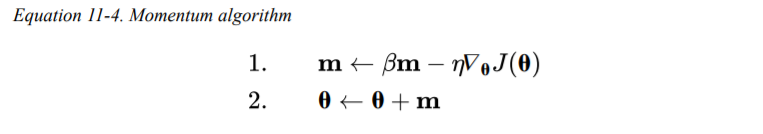

optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

### nesterov accelerated gradient 

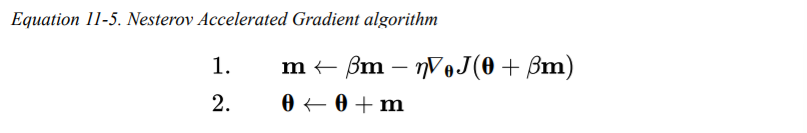

optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

### adagrad 

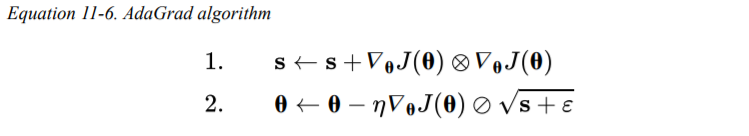

not recommented in dnn

### RMSProp 

fix the adagrad by accumulating only the grdients from the most recent iterations

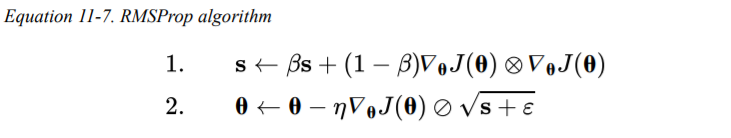

optimizer = keras.optimizers.RMSprop(lr = 0.001, tho = 0.9)

### adam and Nadam optimization

use a combination of adagrad and RMSprop 

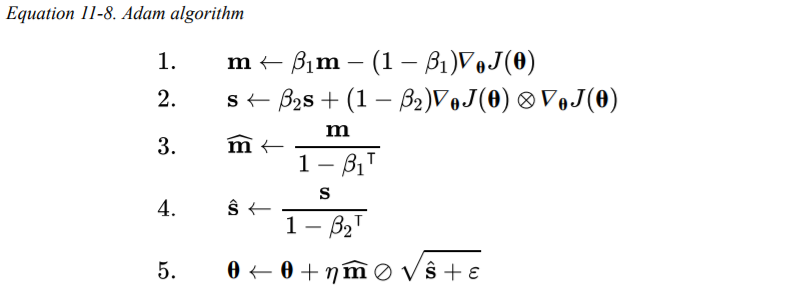

optimizer = keras.optimizers.Adam(lr=0.001, beta_l=0.9, beta_2=0.99)

In [2]:
# adamax 

# nadam

### Learning rate scheduling 

In [3]:
### power scheduling 

### exponential scheduling 

### piecewise constant scheduling 

### performance sheduling 

### 1 cycle scheduling 

In [4]:
### power scheduling 

# optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [9]:
### exp scheduling 

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch): 
        return 0.01 * 0.1**(epoch/s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20) 

# callback 
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn) 
#history = model.fit(X_train_scalerd, y_train, [...], callbacks=[lr_scheduler])

In [10]:
### piecewise schedualing 

def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else: 
        return 0.001
    
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

### Avoiding Overfitting Through Regularization 

In [11]:
# L1 & L2 

# dropout 

# max-norm 

### L1 & L2 

In [13]:
# add L2 to one layer 

layer = keras.layers.Dense(100, activation='elu', 
                          kernel_initializer='he_normal',
                          kernel_regularizer=keras.regularizers.l2(0.01))

In [14]:
# or use 'partial' from functools to warp it 

from functools import partial

RegularizedDense = partial(keras.layers.Dense,
    activation="elu",
    kernel_initializer="he_normal",
    kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax",
                     kernel_initializer='glorot_uniform') 
])


### Dropout 

In [26]:
# scale the input data 

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [27]:
# tip: need to multiply each input connnection weight by the 
# keep probability (1-p) after training 

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 12s 6ms/step - loss: 0.5764 - accuracy: 0.8024 - val_loss: 0.3797 - val_accuracy: 0.8630
Epoch 2/2
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4235 - accuracy: 0.8455 - val_loss: 0.3412 - val_accuracy: 0.8690


In [28]:
### Monte Carlo(MC) Dropout 

y_probas = np.stack([model(X_test_scaled, training=True)
                    for sample in range(100)])

y_proba = y_probas.mean(axis=0)

In [29]:
# prediction without dropout 

np.round(model.predict(X_test_scaled[:1]),2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.93]],
      dtype=float32)

In [31]:
# with droput 

np.round(y_probas[:, :1],2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.39, 0.  , 0.6 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.14, 0.  , 0.83]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.44, 0.  , 0.55]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.28, 0.  , 0.71]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.05, 0.  , 0.94]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.49, 0.  , 0.5 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.29, 0.  , 0.69]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.12, 0.  , 0.87]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.95]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.08, 0.  , 0.91]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0

### Max-norm Regularization 

In [32]:
keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal',
                  kernel_constraint = keras.constraints.max_norm(1.))

# Summary 

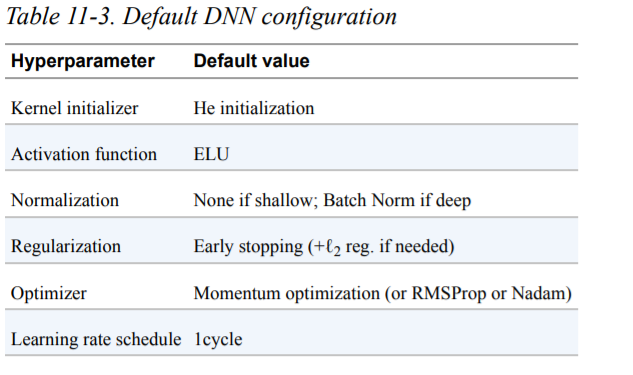